In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

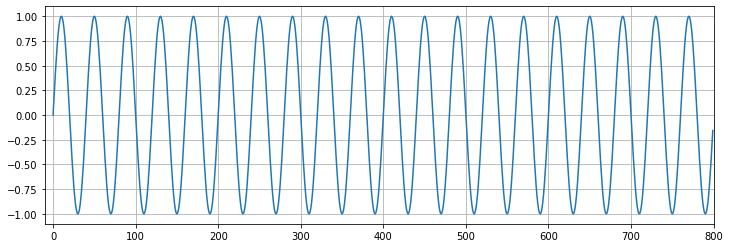

In [7]:
x = torch.linspace(0,799,steps = 800)
y = torch.sin(x*2*3.1416 / 40)

plt.figure(figsize = (12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())
plt.show()

In [8]:
x.shape, y.shape

(torch.Size([800]), torch.Size([800]))

In [9]:
x.min(),x.max(),y.max(),y.min()

(tensor(0.), tensor(799.), tensor(1.), tensor(-1.))

In [12]:
test_size = 40

train_set = y[: -test_size]
test_set = y[-test_size:]

In [13]:
train_set.shape, test_set.shape

(torch.Size([760]), torch.Size([40]))

In [14]:
def input_data(seq, ws):

    out =[]
    L = len(seq)

    for i in range(L - ws):

        window = seq[i : i+ws]

        label = seq[i+ws : i+ws+1]

        out.append((window, label))

    return out

In [16]:
input_data(seq = [1,2,3,4,5], ws = 3)

[([1, 2, 3], [4]), ([2, 3, 4], [5])]

In [15]:
window_size = 40

train_data = input_data(train_set, window_size)
len(train_data)

720

In [21]:
train_data[0][0].shape,train_data[0][1].shape

(torch.Size([40]), torch.Size([1]))

In [22]:
# 0 - 799 --- > 800
# 800 - 40 --- > 760
# 760 - 40 --- > 720

In [23]:
for X_train, y_train in train_data:
    break

In [27]:
X_train.view(len(X_train), 1, -1).shape

torch.Size([40, 1, 1])

In [40]:
class LSTM(nn.Module):

    def __init__(self, input_size = 1, hidden_size = 50, out_size = 1):

        super().__init__()

        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size, hidden_size)

        self.linear = nn.Linear(hidden_size, out_size)

        # Initialize h0 and c0
        self.hidden = (torch.zeros(1,1,hidden_size),
                       torch.zeros(1,1,hidden_size))
        
    def forward(self, seq):

        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)

        pred = self.linear(lstm_out.view(len(seq), -1))

        return pred[-1]

In [51]:
torch.manual_seed(42)

model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [52]:
for name, param in model.named_parameters():
    print(name,"\t", param.shape)
    print("".center(200,"-"))

lstm.weight_ih_l0 	 torch.Size([200, 1])
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
lstm.weight_hh_l0 	 torch.Size([200, 50])
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
lstm.bias_ih_l0 	 torch.Size([200])
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
lstm.bias_hh_l0 	 torch.Size([200])
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
linear.weight 	 torch.Size([1, 50])
-----

In [53]:
test = torch.linspace(1,4, 4)
test = test.view(len(test), 1, -1)
test.shape

torch.Size([4, 1, 1])

In [54]:
model(test)

tensor([-0.1684], grad_fn=<SelectBackward0>)

In [55]:
def count_parameters(model):

    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f"{item:>6}")

    print(f"_______\n{sum(params):>6}")

count_parameters(model)

   200
 10000
   200
   200
    50
     1
_______
 10651


In [56]:
for i, (seq,train) in enumerate(train_data):
    print(seq.shape, train.shape)
    if i == 3:
        break

torch.Size([40]) torch.Size([1])
torch.Size([40]) torch.Size([1])
torch.Size([40]) torch.Size([1])
torch.Size([40]) torch.Size([1])


In [57]:
# Train_set,test_set ile train_data Farklı !!!
len(train_data), len(train_set)

(720, 760)

In [58]:
model.hidden_size, window_size

(50, 40)

Epoch :    1, Loss : 0.09212877

Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.6071590185165405


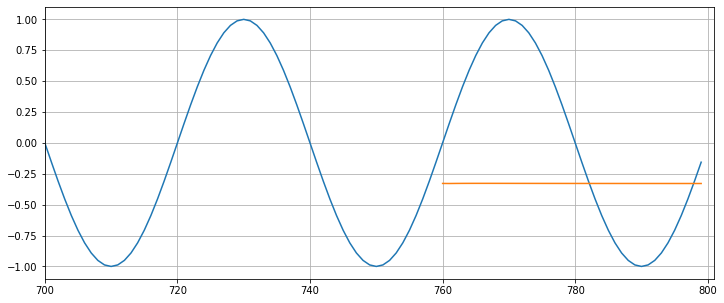

Epoch :    2, Loss : 0.06506767

Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.5650987029075623


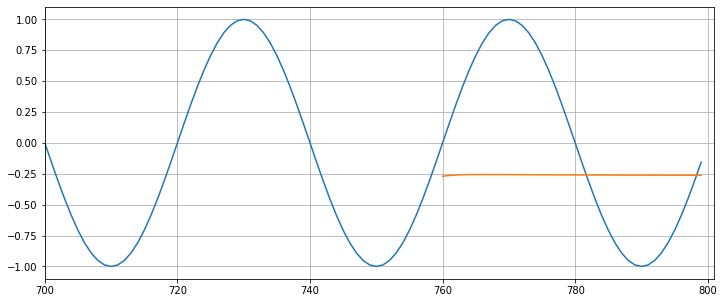

Epoch :    3, Loss : 0.04198048

Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.5199716687202454


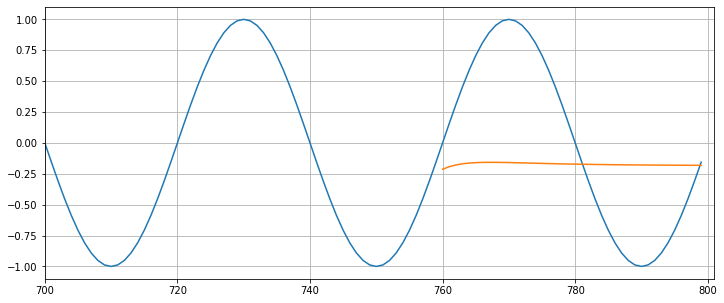

Epoch :    4, Loss : 0.01784276

Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.42209967970848083


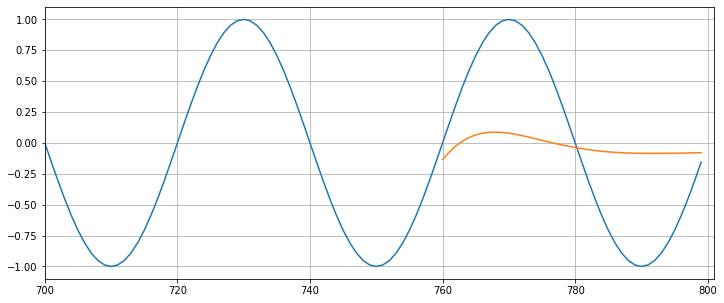

Epoch :    5, Loss : 0.00288710

Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.16624125838279724


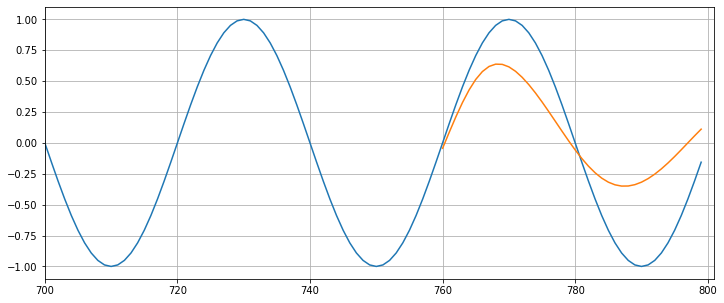

Epoch :    6, Loss : 0.00032008

Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.030554424971342087


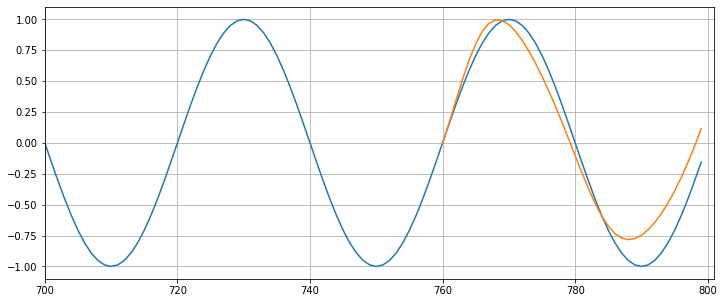

Epoch :    7, Loss : 0.00012969

Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.014990185387432575


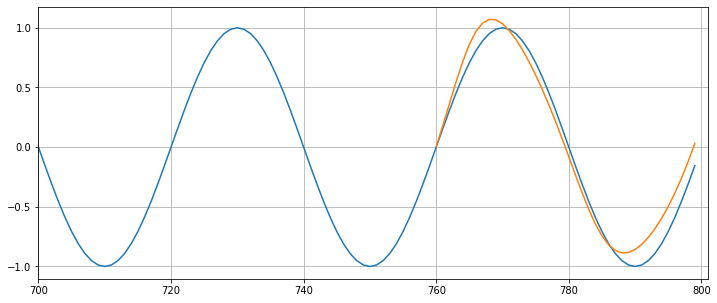

Epoch :    8, Loss : 0.00012007

Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.01185668632388115


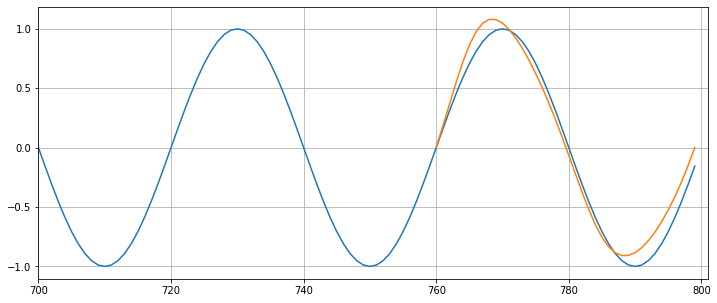

Epoch :    9, Loss : 0.00012656

Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.010163827799260616


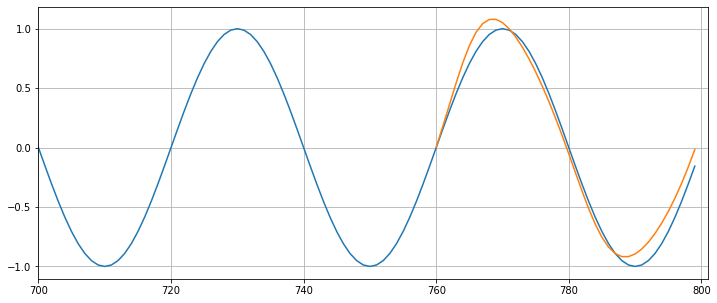

Epoch :   10, Loss : 0.00013195

Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.008897590450942516


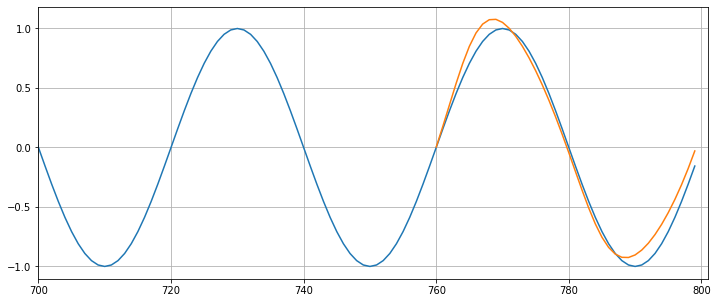

In [59]:
epochs = 10
future = 40

for i in range(epochs):

    # Burda model eğitiliyor !!!
    # Train_data bu unutma !!!

    for seq, y_train in train_data:

        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch : {i+1:4}, Loss : {loss.item():10.8f}")

    # Train_set ile train_data dikkat et !! Karıştırma !!
    ###
    # Bu son preds yani şöyle normalde bizim train_set yani 760 değere sahip bir değer
    # Biz burdan son 40 değerini alıyoruz yani preds değerini shape = 40 oluyor train_set olarak 720 değer geride kalıyor
    # Bizim bu sahip olmuş olduğumuz 40 değerin üstüne 40 future daha ekliyoruz ve 80 preds sahip oluyoruz 
    # Burda sahip olmuş olduğumuz 80 değerin son 40 tahmin değerinden gelme yani model den gelme !!!
    # 720 + 80 = 800 oluyor

    preds = train_set[-window_size :].tolist()
    print()
    print("Train Set Preds Shape : ",np.array(preds).shape)

    for f in range(future):

        # 40 değer var train'dan gelme
        # Tabi üstüne ekleye ekleye gidicek öyle alıcaz !!!
        seq = torch.FloatTensor(preds[-window_size:])

        with torch.no_grad():

            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            
            preds.append(model(seq).item())

    print("Append Preds Shape : ", np.array(preds).shape)

    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print()
    print(f"Performance On Test Range : {loss}")

    plt.figure(figsize = (12,5))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800), preds[-window_size:])
    plt.show()

# Forecast Into An UnKnown Future

In [60]:
epochs = 10
window_size = 40
future = 40

all_data = input_data(y,window_size)
len(all_data)

760

In [61]:
for i,(seq,train) in enumerate(all_data):
    print(seq.shape, train.shape)
    if i == 3:
        break

torch.Size([40]) torch.Size([1])
torch.Size([40]) torch.Size([1])
torch.Size([40]) torch.Size([1])
torch.Size([40]) torch.Size([1])


In [62]:
import time
start_time = time.time()

for i in range(epochs):

    for seq,y_train in all_data:

        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), 
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    print(f"Epoch : {i+1:2}, Loss : {loss.item():10.8f}")

print()
print(f"\nDuration : {time.time() - start_time:.0f} seconds")

Epoch :  1, Loss : 0.00013453
Epoch :  2, Loss : 0.00013443
Epoch :  3, Loss : 0.00013232
Epoch :  4, Loss : 0.00012880
Epoch :  5, Loss : 0.00012434
Epoch :  6, Loss : 0.00011931
Epoch :  7, Loss : 0.00011398
Epoch :  8, Loss : 0.00010854
Epoch :  9, Loss : 0.00010313
Epoch : 10, Loss : 0.00009784


Duration : 74 seconds


In [64]:
preds = y[-window_size:].tolist()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size), 
                        torch.zeros(1,1,model.hidden_size))
        
        preds.append(model(seq).item())

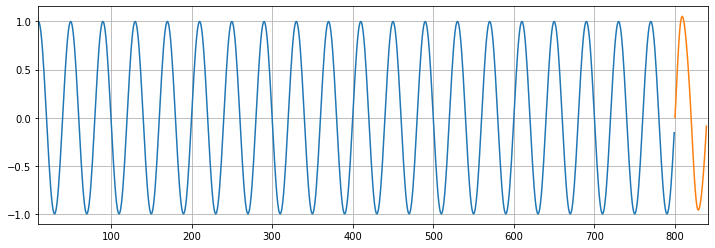

In [66]:
plt.figure(figsize = (12,4))
plt.xlim(10,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future), preds[window_size:])
plt.show()

----

# RNN On A Time Series

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets, transforms,models
from torchvision.utils import make_grid
from torch.utils.data import DataLoader,TensorDataset

from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [72]:
path = "/content/drive/MyDrive/PyTorch/Data/TimeSeriesData/Alcohol_Sales.csv"
df = pd.read_csv(path, parse_dates = True, index_col = 0)
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [73]:
df.isnull().sum()

S4248SM144NCEN    0
dtype: int64

In [74]:
df.columns

Index(['S4248SM144NCEN'], dtype='object')

In [75]:
print("Before : ", len(df))
df.dropna(inplace = True)
print("After : ", len(df))

Before :  325
After :  325


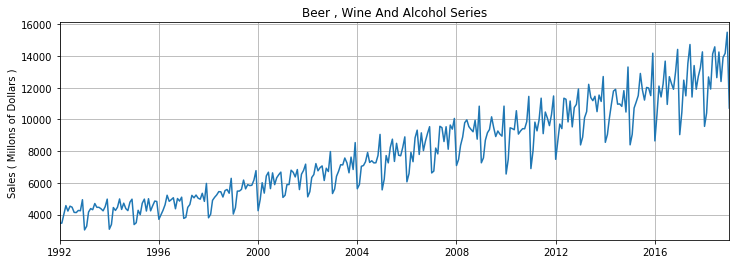

In [77]:
plt.figure(figsize = (12,4))
plt.title("Beer , Wine And Alcohol Series")
plt.ylabel("Sales ( Millons of Dollars ) ")
plt.grid(True)
plt.autoscale(axis = "x", tight = True)

plt.plot(df.iloc[:,0])
plt.show()

In [79]:
y = df.iloc[:,0].values.astype(float)

test_size = 12
train_set = y[:-test_size]
test_set = y[-test_size :]

train_set.shape , test_set.shape

((313,), (12,))

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

train_norm = scaler.fit_transform(train_set.reshape(-1,1))

train_norm.max(),train_norm.min()

(1.0, 0.0)

In [82]:
train_norm.mean(),train_norm.std()

(0.3979029910805844, 0.23590921168402063)

In [83]:
train_norm = torch.FloatTensor(train_norm).view(-1)
type(train_norm), train_norm.shape

(torch.Tensor, torch.Size([313]))

In [84]:
window_size = 12

def input_data(seq , ws):

    out = []
    L = len(seq)

    for i in range(L-ws):

        window = seq[i: i+ws]
        label = seq[i + ws : i + ws + 1]

        out.append((window, label))

    return out

In [87]:
train_data = input_data(train_norm, window_size)
train_data[0][0].shape,train_data[0][1].shape

(torch.Size([12]), torch.Size([1]))

In [88]:
len(train_data),len(train_set)

(301, 313)

In [89]:
for i,(seq,train) in enumerate(train_data):
    print(seq.shape, train.shape)
    if i == 3:
        break

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])


In [93]:
class LSTMnetwork(nn.Module):

    def __init__(self, input_size = 1, hidden_size = 100, output_size = 1):

        super().__init__()

        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size, hidden_size)

        self.linear = nn.Linear(hidden_size, output_size)

        self.hidden = (torch.zeros(1,1,hidden_size),
                       torch.zeros(1,1,hidden_size))
        
    def forward(self, seq):

        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)

        pred = self.linear(lstm_out.view(len(seq), -1))

        return pred[-1]

In [94]:
torch.manual_seed(101)

model = LSTMnetwork()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [96]:
for name,param in model.named_parameters():
    print(name,"\t",param.shape)
    print("".center(100,"-"))

lstm.weight_ih_l0 	 torch.Size([400, 1])
----------------------------------------------------------------------------------------------------
lstm.weight_hh_l0 	 torch.Size([400, 100])
----------------------------------------------------------------------------------------------------
lstm.bias_ih_l0 	 torch.Size([400])
----------------------------------------------------------------------------------------------------
lstm.bias_hh_l0 	 torch.Size([400])
----------------------------------------------------------------------------------------------------
linear.weight 	 torch.Size([1, 100])
----------------------------------------------------------------------------------------------------
linear.bias 	 torch.Size([1])
----------------------------------------------------------------------------------------------------


In [98]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f"{item:>6}")
    print(f"______\n{sum(params):>6}")

count_parameters(model)

   400
 40000
   400
   400
   100
     1
______
 41301


In [99]:
epochs = 100

import time

start_time = time.time()

for epoch in range(epochs):

    for seq, y_train in train_data:

        optimizer.zero_grad()

        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch : {epoch+1:2}, Loss : {loss.item():10.7f}")

print(f"\nDuration : {time.time() - start_time} seconds")

Epoch :  1, Loss :  0.1031235
Epoch :  2, Loss :  0.1042517
Epoch :  3, Loss :  0.1050867
Epoch :  4, Loss :  0.1030925
Epoch :  5, Loss :  0.0905065
Epoch :  6, Loss :  0.0895753
Epoch :  7, Loss :  0.0933667
Epoch :  8, Loss :  0.0984824
Epoch :  9, Loss :  0.1004576
Epoch : 10, Loss :  0.1009486
Epoch : 11, Loss :  0.1015403
Epoch : 12, Loss :  0.1009493
Epoch : 13, Loss :  0.1001064
Epoch : 14, Loss :  0.0987067
Epoch : 15, Loss :  0.0964564
Epoch : 16, Loss :  0.0972915
Epoch : 17, Loss :  0.0964447
Epoch : 18, Loss :  0.0949592
Epoch : 19, Loss :  0.0914766
Epoch : 20, Loss :  0.0628022
Epoch : 21, Loss :  0.0969705
Epoch : 22, Loss :  0.0897667
Epoch : 23, Loss :  0.0774583
Epoch : 24, Loss :  0.0623396
Epoch : 25, Loss :  0.0504205
Epoch : 26, Loss :  0.0458061
Epoch : 27, Loss :  0.0293116
Epoch : 28, Loss :  0.0794053
Epoch : 29, Loss :  0.0316171
Epoch : 30, Loss :  0.0566157
Epoch : 31, Loss :  0.0206659
Epoch : 32, Loss :  0.0189780
Epoch : 33, Loss :  0.0477313
Epoch : 34

In [100]:
future = 12

preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        preds.append(model(seq).item())

In [103]:
print(len(preds))
preds[window_size:]

24


[0.649753212928772,
 0.8241337537765503,
 0.7263177037239075,
 0.9413589239120483,
 0.9504050016403198,
 0.7450836300849915,
 0.9766193628311157,
 0.7672684192657471,
 0.8339799642562866,
 0.9287575483322144,
 0.9626377820968628,
 0.5508256554603577]

In [104]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1,1))
true_predictions

array([[10632.46283805],
       [12672.54078543],
       [11528.19081587],
       [14043.95805085],
       [14149.78811419],
       [11747.73338836],
       [14456.46992576],
       [12007.27323699],
       [12787.73160183],
       [13896.53455794],
       [14292.89941275],
       [ 9475.10934323]])

In [105]:
df.iloc[:,0][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

In [107]:
x = np.arange("2018-02-01", "2019-02-01", dtype = "datetime64[M]").astype("datetime64[D]")
x

array(['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
       '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
       '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='datetime64[D]')

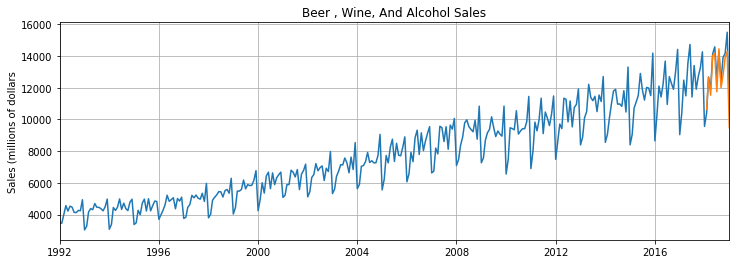

In [108]:
plt.figure(figsize = (12,4))
plt.title("Beer , Wine, And Alcohol Sales")
plt.ylabel("Sales (millions of dollars")
plt.grid(True)
plt.autoscale(axis = "x", tight = True)

plt.plot(df.iloc[:,0])
plt.plot(x,true_predictions)
plt.show()

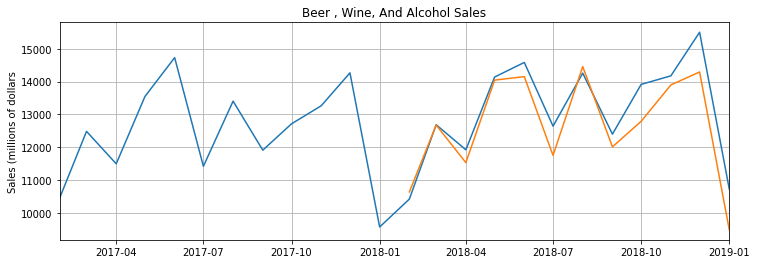

In [109]:
plt.figure(figsize = (12,4))
plt.title("Beer , Wine, And Alcohol Sales")
plt.ylabel("Sales (millions of dollars")
plt.grid(True)
plt.autoscale(axis = "x", tight = True)

plt.plot(df.iloc[:,0][-24:])
plt.plot(x,true_predictions)
plt.show()

# Forecast Into An Unknown Future

In [110]:
window_size = 12
epochs = 100

model.train()

y = df.iloc[:,0].values.astype(float)

y_norm = scaler.fit_transform(y.reshape(-1,1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm, window_size)

import time

start_time = time.time()

for epoch in range(epochs):

    for seq,y_train in all_data:

        optimizer.zero_grad()

        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch : {epoch + 1: 2}, Loss : {loss.item():10.7f}")

print(f"\nDuration : {time.time() - start_time} seconds...")

Epoch :  1, Loss :  0.0035861
Epoch :  2, Loss :  0.0072910
Epoch :  3, Loss :  0.0048755
Epoch :  4, Loss :  0.0040364
Epoch :  5, Loss :  0.0062294
Epoch :  6, Loss :  0.0052143
Epoch :  7, Loss :  0.0050486
Epoch :  8, Loss :  0.0038804
Epoch :  9, Loss :  0.0034297
Epoch :  10, Loss :  0.0021858
Epoch :  11, Loss :  0.0055579
Epoch :  12, Loss :  0.0030953
Epoch :  13, Loss :  0.0054914
Epoch :  14, Loss :  0.0027896
Epoch :  15, Loss :  0.0022656
Epoch :  16, Loss :  0.0020554
Epoch :  17, Loss :  0.0021439
Epoch :  18, Loss :  0.0025440
Epoch :  19, Loss :  0.0029357
Epoch :  20, Loss :  0.0032763
Epoch :  21, Loss :  0.0035127
Epoch :  22, Loss :  0.0035867
Epoch :  23, Loss :  0.0037228
Epoch :  24, Loss :  0.0037982
Epoch :  25, Loss :  0.0038254
Epoch :  26, Loss :  0.0038337
Epoch :  27, Loss :  0.0037670
Epoch :  28, Loss :  0.0037053
Epoch :  29, Loss :  0.0035728
Epoch :  30, Loss :  0.0034352
Epoch :  31, Loss :  0.0032738
Epoch :  32, Loss :  0.0031344
Epoch :  33, Loss

In [112]:
window_size = 12
future = 12
L = len(y)

preds = y_norm[-window_size :].tolist()

model.eval()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():

        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        preds.append(model(seq).item())

In [113]:
len(preds)

24

In [114]:
df.tail(12)

,S4248SM144NCEN
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [115]:
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1,1))

x = np.arange("2019-02-01", "2020-02-01", dtype = "datetime64[M]").astype("datetime64[D]")
x

array(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
       '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
       '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01'],
      dtype='datetime64[D]')

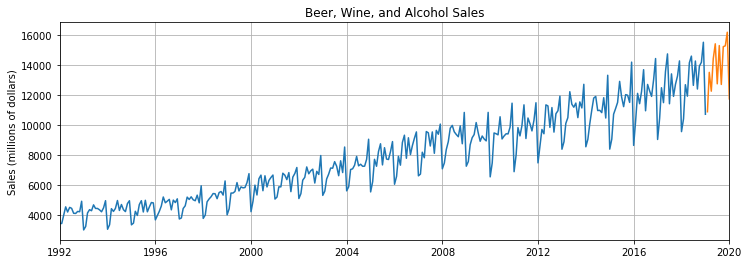

In [117]:
plt.figure(figsize = (12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

plt.plot(df.iloc[:,0])
plt.plot(x,true_predictions[-window_size:])
plt.show()

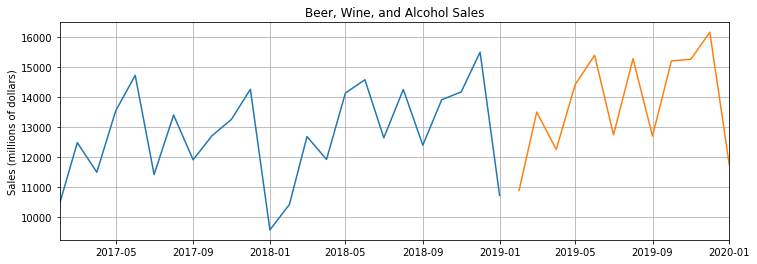

In [118]:
plt.figure(figsize = (12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

plt.plot(df.iloc[:,0][-24:])
plt.plot(x,true_predictions[-window_size:])
plt.show()